In [ ]:
#visualização de dados
import seaborn as sns
#ciência de dados
import pandas as pd
#mapas e geolocalização
import geopandas as gpd
import folium
#manipulação de arquivos json
import json
# para download no Colab
from google.colab import files

In [ ]:
mesorregioes = {
  "São Paulo": "São Paulo",
  "Campinas": "Campinas",
  "Ribeirão Preto": "Ribeirão Preto",
  "São José do Rio Preto": "São José do Rio Preto",
  "Bauru": "Bauru",
  "Piracicaba": "Piracicaba",
  "São José dos Campos": "São José dos Campos",
  "Araraquara": "Araraquara",
  "Araçatuba": "Araçatuba",
  "Marília": "Marília",
  "Presidente Prudente": "Presidente Prudente",
  "Itapetininga": "Itapetininga",
  "Litoral": "Santos",
  "Assis": "Assis",
  "Sorocaba": "Sorocaba"
}


In [ ]:
#Ler dados dos arquivos

atividade = pd.read_json('atividade.json');
cursosArea = pd.read_json('cursosArea.json');
coordenadas_cidades = pd.read_json('coordenadas_cidades.json');

In [ ]:
# Função para exibir o menu e capturar a escolha do usuário
def escolher_mesorregiao():
    print("Escolha uma mesorregião de São Paulo:")
    for i, meso in enumerate(mesorregioes.keys(), start=1):
        print(f"{i}. {meso}")
    escolha = int(input("Digite o número correspondente à mesorregião: "))
    mesorregiao = list(mesorregioes.keys())[escolha - 1]
    cidade = mesorregioes[mesorregiao]
    print(f"\nMesorregião escolhida: {mesorregiao}")
    print(f"Maior cidade: {cidade}")
    return cidade

In [ ]:
def capturar_areas(cidade):
    qnt = []  # Lista para armazenar as quantidades de cursos para cada área
    # Exibe as áreas com maior atividade econômica
    print("Áreas com maior atividade na cidade escolhida:")

    for i in range(5):
        # Exibe a área com o índice correto
        print(f"\n{i + 1} - {atividade[cidade]['areas'][i]}")

    print("\nEscolha quantos cursos de cada área você deseja (Total = 10).")

    while True:
        # Solicitando ao usuário a quantidade de cursos para cada área
        a1 = int(input("Área 1: "))
        qnt.append(a1)
        a2 = int(input("Área 2: "))
        qnt.append(a2)
        a3 = int(input("Área 3: "))
        qnt.append(a3)
        a4 = int(input("Área 4: "))
        qnt.append(a4)
        a5 = int(input("Área 5: "))
        qnt.append(a5)

        # Verifica se a soma das áreas é igual a 10
        if (a1 + a2 + a3 + a4 + a5) == 10:
            break  # Se a soma for igual a 10, sai do loop
        else:
            qnt.clear()
            print("A soma dos valores tem que ser igual a 10. Tente novamente.")

    # Retorna as quantidades de cursos para cada área
    return qnt


In [ ]:
def sugerir_cursos(cidade, qnt):
    cursos = []  # Lista para armazenar os cursos sugeridos
    i = 0
    cursos_def = []
    # Exibir a lista de cursos sugeridos
    print(f"\nCursos sugeridos para a cidade: {cidade}")

    # Itera sobre as áreas dessa cidade
    for area in atividade[cidade]["areas"]:
        if area in cursosArea:  # Verifica se a área tem cursos cadastrados
            cursos_da_area = cursosArea[area][:qnt[i]]  # Limita a i cursos por área
            cursos.extend(cursos_da_area)  # Adiciona os cursos dessa área à lista 'cursos'
            print(f"\nÁrea: {area}")
            for curso in cursos_da_area:
                print(f"- {curso}")
                cursos_def.append(curso)


        i += 1;

    return cursos_def

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def gerar_mapa(coordenadas, cursos, shapefile_path, cidade):

    # Carregar o shapefile do estado de São Paulo
    estado_sp = gpd.read_file(shapefile_path)

    # Desempacotando a coordenada de latitude e longitude
    latitude, longitude = coordenadas

    # Criando o gráfico
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plotando o mapa do estado de São Paulo usando GeoPandas
    estado_sp.plot(ax=ax, color='lightgray', edgecolor='black', zorder=1)

    # Plotando o ponto representando a cidade
    ax.scatter(longitude, latitude, color='red', s=100, label='Cidade', zorder=5)  # Marca a cidade com um ponto

    # Colocando o título do gráfico
    plt.title('Estado de São Paulo - Cidade e Cursos Sugeridos', fontsize=16)

    # Criando a legenda com os cursos
    legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label=cidade)]

    for curso in cursos:
        legend_elements.append(Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue', markersize=10, label=curso))

    # Exibindo a legenda
    ax.legend(handles=legend_elements, title="Cursos", loc='upper right', fontsize=10, bbox_to_anchor=(1.5, 1))

    # Definindo rótulos para os eixos
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Ajustando o gráfico para melhor visualização
    plt.grid(True)

    # Exibindo o gráfico
    plt.show()

In [ ]:
# Função principal para executar o programa
def main():
    cidade = escolher_mesorregiao()
    qnt = capturar_areas(cidade)
    cursos = sugerir_cursos(cidade, qnt)
    coordenadas = coordenadas_cidades[cidade]
    gerar_mapa(coordenadas, cursos, "SP_Mesorregioes_2022.shp", cidade)

Escolha uma mesorregião de São Paulo:
1. São Paulo
2. Campinas
3. Ribeirão Preto
4. São José do Rio Preto
5. Bauru
6. Piracicaba
7. São José dos Campos
8. Araraquara
9. Araçatuba
10. Marília
11. Presidente Prudente
12. Itapetininga
13. Litoral
14. Assis
15. Sorocaba
Digite o número correspondente à mesorregião: 5

Mesorregião escolhida: Bauru
Maior cidade: Bauru
Áreas com maior atividade na cidade escolhida:

1 - Comércio

2 - Administração

3 - Saúde

4 - Construção

5 - Educação

Escolha quantos cursos de cada área você deseja (Total = 10).
Área 1: 0
Área 2: 10
Área 3: 0
Área 4: 0
Área 5: 0

Cursos sugeridos para a cidade: Bauru

Área: Comércio

Área: Administração
- Administração
- Administração Pública
- Ciências Contábeis
- Economia
- Gestão Comercial
- Gestão de Recursos Humanos
- Gestão de Tecnologia da Informação
- Gestão Financeira
- Marketing
- Processos Gerenciais

Área: Saúde

Área: Construção

Área: Educação


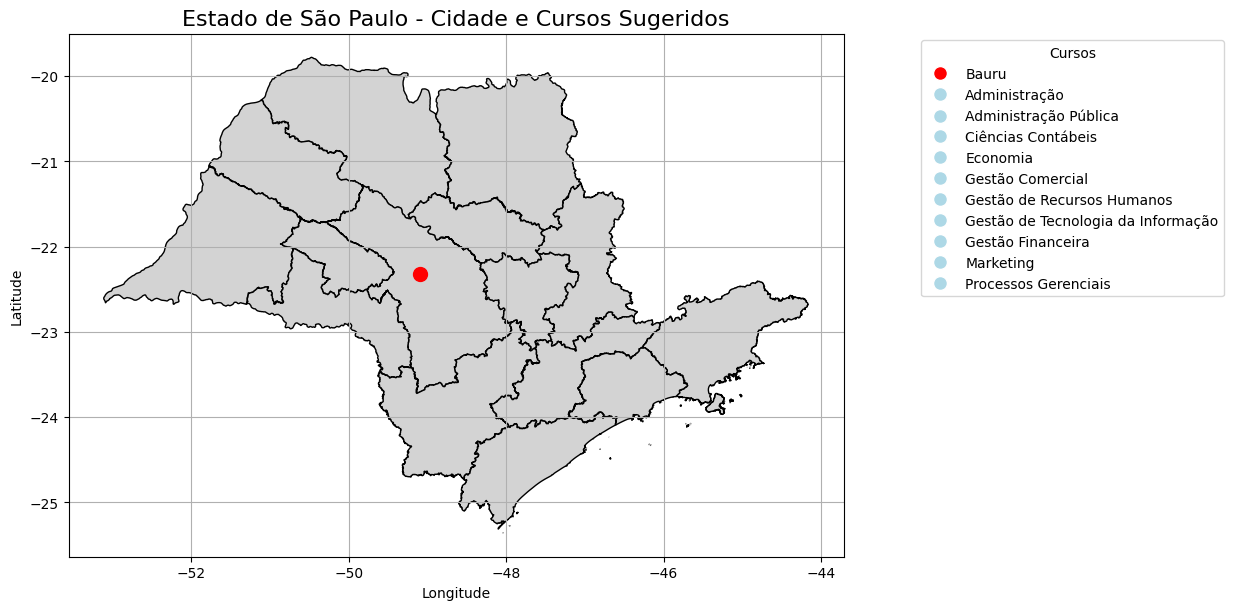

In [ ]:
# Executa o programa
if __name__ == "__main__":
    main()